<a href="https://colab.research.google.com/github/tallwin/Random-Forests-Company-Data/blob/main/Company%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/content/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


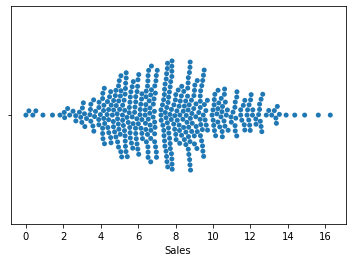

In [5]:
sns.swarmplot(df["Sales"])

In [6]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
    
df.Sales=df.Sales.apply(split)

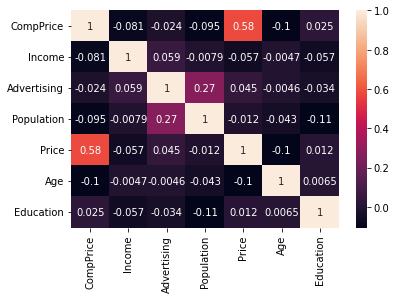

In [7]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
le=LabelEncoder()

In [11]:
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["Urban"]=le.fit_transform(df["Urban"])
df["US"]=le.fit_transform(df["US"])

In [12]:
x=df.iloc[:,1:11]
y=df.iloc[:,0]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
#RandomForest Classifier
RF=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
RF.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [15]:
preds=RF.predict(x_test)
confusion_matrix(y_test,preds)

array([[41,  4,  4],
       [ 8,  9,  0],
       [10,  0,  4]])

In [16]:
#Accuracy
accuracy_score(y_test,preds)

0.675

In [17]:
pd.Series(preds).value_counts()

average sale    59
high sale       13
low sale         8
dtype: int64

In [18]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

,actual,predicted
174,low sale,low sale
24,high sale,average sale
118,average sale,average sale
383,average sale,high sale
274,average sale,average sale
...,...,...
281,high sale,high sale
389,average sale,average sale
316,high sale,high sale
379,average sale,average sale


In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

average sale       0.69      0.84      0.76        49
   high sale       0.69      0.53      0.60        17
    low sale       0.50      0.29      0.36        14

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.57        80
weighted avg       0.66      0.68      0.66        80

